# Logistic Regression (Simple Example)

First the usual libraries are importet. Then we read the data. Each line consists of two real numbers $x_1$ and $x_2$ and the corresponding label $y\in\left\{0,1\right\}$ which specifies in which of the two classes $(x_1,x_2)$ lies. Finally we create the data matrix $\mathbf{X}$ whos rows are of the form $[1, x_1, x_2]$ and the vector $\mathbf{y}$ which contains the labels.

In [127]:
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt

data_01 = genfromtxt('classification_data.csv',
                     delimiter=',')
n = data_01.shape[0]
X = np.c_[np.ones((n,1)),data_01[:,0:2]]
y = np.array([data_01[:,2]]).transpose()

Let's define the sigmoid function

$$
\displaystyle\sigma(z)=\frac{1}{1+e^{-z}}
$$

We can call it also if $z$ is a vector!

In [121]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Now lets compute the cost function

$$
    J(\boldsymbol\theta) = \sum_{i=1}^n J_i(\boldsymbol\theta) =
      - \frac{1}{n} \sum_{i=1}^n%
        \left[y^{(i)}\log\left(h(\boldsymbol\theta,\mathbf{x}^{(i)})\right)
            + \left(1-y^{(i)}\right)\log\left(
               1-h(\boldsymbol\theta,\mathbf{x}^{(i)})\right)\right]
$$

where $h(\boldsymbol\theta,\mathbf{x}^{(i)})= \sigma\left((\mathbf{x}^{(i)})^T\boldsymbol\theta\right)$ and $\sigma$ is the sigmoid function.

In [128]:
def cost_function(X, y, theta):
    y_hat = sigmoid(np.dot(X,theta))
    J_i = - y*np.log(y_hat) - (1-y)*np.log(1-y_hat)
    J = J_i.sum()/len(y)
    return J

Next we compute the update to $\boldsymbol\theta$

$$
\boldsymbol\theta_{k+1} = \boldsymbol\theta_{k}-\alpha\frac{1}{n}\sum_{i=1}^n
      \left(h(\boldsymbol\theta_k,\mathbf{x}^{(i)})-y^{(i)}\right)\mathbf{x}^{(i)},
$$

where again $h(\boldsymbol\theta,\mathbf{x}^{(i)})= \sigma\left((\mathbf{x}^{(i)})^T\boldsymbol\theta\right)$ and $\sigma$ is the sigmoid function.

In [123]:
def update_theta(X, y, theta, alpha):
    y_hat = sigmoid(np.dot(X, theta))
    gradient = np.dot(X.T, y_hat - y)/len(y)
    theta -= alpha*gradient
    return theta

Finally the Gradient Descent Algorithm

$$
\mathbf{Repeat}\;\mathrm{(until}\;\mathrm{convergence)} \left\{\right.
  \qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\\
      \boldsymbol\theta_{k+1} = \boldsymbol\theta_{k}-\alpha\frac{1}{n}\sum_{i=1}^n
          \left(h(\boldsymbol\theta_k,\mathbf{x}^{(i)})-y^{(i)}\right)\mathbf{x}^{(i)},
          \quad k = 0,\,1,\,2,\,3,\,\ldots,\mathtt{kmax}\\
    \left.\right\}\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad
$$


In [124]:
def train(X, y, theta, alpha, kmax):
    cost_history = []
    for i in range(kmax):
        theta = update_theta(X, y, theta, alpha)
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

The rest is just defining the start vector $\boldsymbol\theta_0$, the learning rate $\alpha$ and the maximal number of iterations in gradient descent $\mathtt{kmax}.

After calling the $\texttt{train}$-function, we print the decision boundary as a linear equation.

decision boundary: -16.145 + 1.744 * x1 + 1.485 * x2 = 0


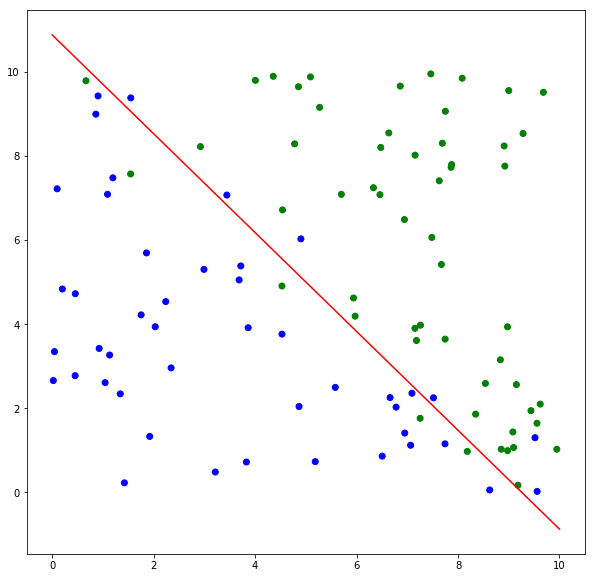

In [125]:
theta = np.array([[0.1],[-0.1],[0.2]])

alpha = 0.1; kmax = 100000

theta, cost_history = train(X, y, theta, alpha, kmax)
print("decision boundary: %.3f + %.3f * x1 + %.3f * x2 = 0"
      % (theta[0],theta[1],theta[2]))

x1 = np.array(X[:,1].T); x2 = np.array(X[:,2].T)

fig, ax = plt.subplots(1,1, figsize=(10,10))
color = ['blue' if l == 0 else 'green' for l in y]
scat = ax.scatter(x1, x2, color=color)

# inline function for decision boundary (unless vertical)
y = lambda x: ((-1)*(theta[0] + theta[1]*x) / theta[2])

def plot_line(y, data_pts):
    x_vals = [i for i in
              range(int(min(data_pts)-1),
                    int(max(data_pts))+2)]
    y_vals = [y(x) for x in x_vals]
    plt.plot(x_vals,y_vals, 'r')

plot_line(y, x1)
plt.show()
#plt.savefig('figs/Logistic_Regression_Ex01.pdf',
#            bbox_inches='tight')